In [2]:
# Regression logistique multinomial & binaire

## Exercices

#### Exercice 1 
Appliquez le modèle de régression logistique sur la dataset “iris“.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

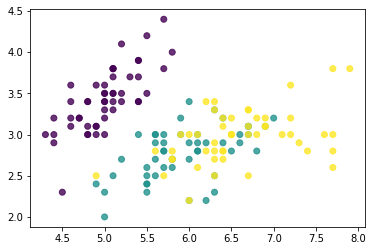

In [6]:
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [7]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
correlations1 = data1.corr()
correlations1['target'].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

In [8]:
X = iris.data[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression(C=1e20, multi_class="multinomial")
model.fit(X_train, y_train)

LogisticRegression(C=1e+20, multi_class='multinomial')

In [9]:
model.score(X_test, y_test)

0.8

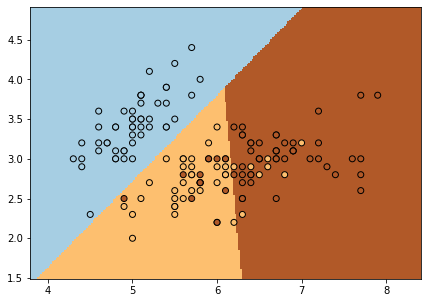

In [10]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(7, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.show()

#### Exercice 2 
Appliquez le modèle de régression logistique sur la dataset “pima“ qui a pour objectif de prévoir si un patient est diabétique ou non.:https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [11]:
data = pd.read_csv('diabetes.csv')

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
correlations = data.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Text(0, 0.5, 'BMI')

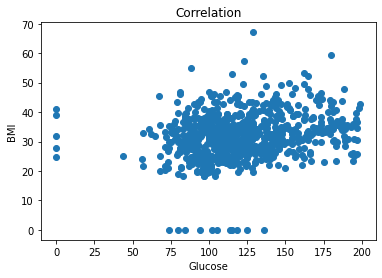

In [14]:
fig, ax = plt.subplots()
plt.figure(1, figsize=(7, 5))
ax.scatter(data.iloc[:,1].values, data.iloc[:,5].values)
ax.set_title('Correlation')
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')

In [15]:
print("min de Glucoce :",data['Glucose'].min())
print("min de BMI :",data['BMI'].min())

min de Glucoce : 0
min de BMI : 0.0


In [16]:
data[['Glucose','BMI']] = data[['Glucose','BMI']].replace(0, np.NaN)
data.dropna(inplace=True)

In [17]:
print("min de Glucoce :",data['Glucose'].min())
print("min de BMI :",data['BMI'].min())

min de Glucoce : 44.0
min de BMI : 18.2


Text(0, 0.5, 'BMI')

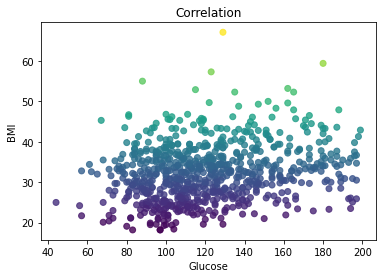

In [18]:
fig, ax = plt.subplots()
plt.scatter(data.iloc[:,1].values, data.iloc[:,5].values, c=data.iloc[:,5], alpha=0.8)
ax.set_title('Correlation')
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')

In [19]:
X = data[['Glucose','BMI']].values
y = data[['Outcome']].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LogisticRegression(C=1e20).fit(X_train, y_train.ravel())

y_pred = model.predict(X_test)

In [21]:
model.score(X_test, y_test)

0.7920353982300885

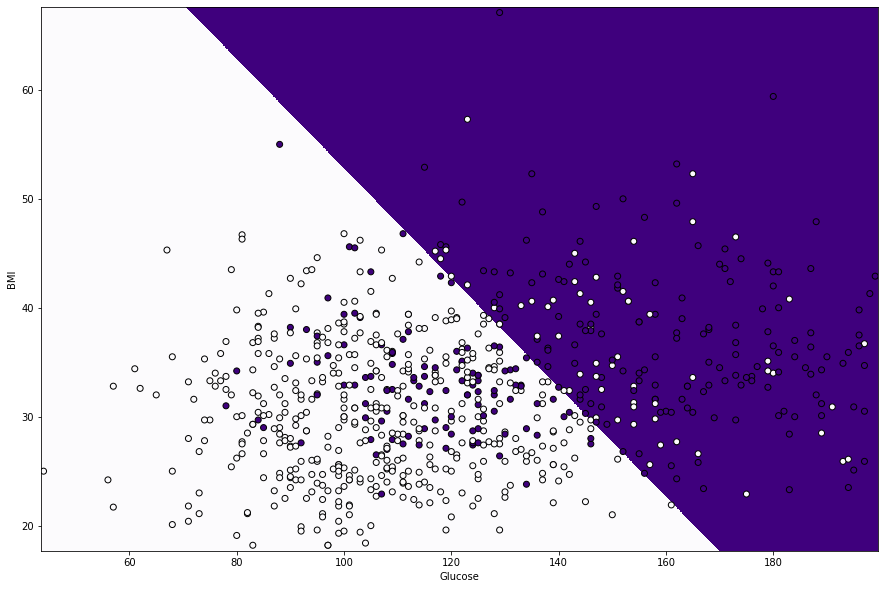

In [27]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
fig.set_size_inches(15, 10, forward=True)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Purples, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Purples)
plt.show()